# TP6
## Alexandre Francony

### Algorithme :
Données : les points a et b, l’entier N et la condition initiale α.<br>
Sorties : les approximations wi de la solution y au point ti = ti−1 + h.<br>
Etape 1 : Initialisation : h = (b−a)/N ; t(1) = a; w(1) = α;
et (t(2),w(2)) et (t(3),w(3)) sont obtenus par la Méthode de Runge-Kutta 4 (voir TP3).<br>
#### Etape 2 : Calcul des approximations :
Pour i = 3 à N, faire :<br>
f0 = f (t(i),w(i))<br>
f1 = f (t(i −1),w(i −1))<br>
f2 = f (t(i −2),w(i −2))<br>
wapprox = w(i) + (h/12)*(23f0 −16f1 + 5f2)<br>
t(i + 1) = t(i) + h<br>
f3 = f (t(i + 1),wapprox)<br>
w(i + 1) = w(i) + (h/12)*(5f3 + 8f0 −f1)<br>
#### Etape 3 : Impression des résultats:
Tracer la solution exacte et la solution approchée en fonction du temps sur un même graphique.<br>
Tracer l’erreur en fonction du temps sur un autre graphique.<br>
### Applications
Soit le problème à valeurs initiales suivant :<br>
y′ = 2y/t + t(^2)(e^t); t ∈[1,2]<br>
y(1) = 0<br>

1) Calculer la solution exacte du problème

In [16]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')

diff_eq = sp.Eq(y(t).diff(t), 2*y(t)/t + t**2*sp.exp(t))

sol = sp.dsolve(diff_eq, y(t))

sol = sol.subs('C1', sol.rhs.subs(t, 1) - 0)

def exact_solution(t):
    return sp.re(sol.rhs.subs('t', t)).evalf()

sol

Eq(y(t), t**2*(C1 + exp(t) + E))

2) Appliquer la M ́ethode Pr ́edicteur-Correcteur avec N = 10.

In [17]:
import numpy as np

def f(t, y):
    return 2 * y / t + t**2 * np.exp(t)

def predictor_corrector(f, a, b, N, alpha):
    h = (b - a) / N
    t = np.zeros(N + 1)
    w = np.zeros(N + 1)
    t[0] = a
    w[0] = alpha

    for i in range(2):
        k1 = h * f(t[i], w[i])
        k2 = h * f(t[i] + h / 2, w[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, w[i] + k2 / 2)
        k4 = h * f(t[i] + h, w[i] + k3)
        w[i + 1] = w[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t[i + 1] = t[i] + h

    for i in range(2, N):
        f0 = f(t[i], w[i])
        f1 = f(t[i - 1], w[i - 1])
        f2 = f(t[i - 2], w[i - 2])
        w_approx = w[i] + (h / 12) * (23 * f0 - 16 * f1 + 5 * f2)
        t[i + 1] = t[i] + h
        f3 = f(t[i + 1], w_approx)
        w[i + 1] = w[i] + (h / 12) * (5 * f3 + 8 * f0 - f1)

    return t, w

t, w = predictor_corrector(f, a=1, b=2, N=10, alpha=0)

3) Tracer la solution exacte fonction du temps, et la solution approchée en fonction du temps, sur un même graphique.

In [18]:
def exact_solution(t):
    return t * np.log(t) + 2 * t

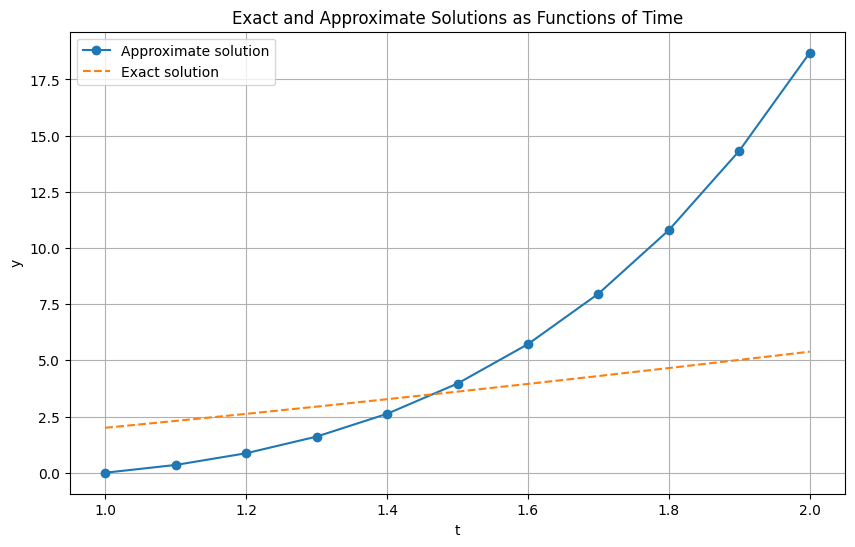

In [20]:
import matplotlib.pyplot as plt

y_exact = [exact_solution(t_i) for t_i in t]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, w, 'o-', label='Approximate solution')
plt.plot(t, y_exact, '--', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Exact and Approximate Solutions as Functions of Time')
plt.legend()
plt.grid(True)
plt.show()